In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):return 1/(1+np.exp(-t))


Calculated weights)
c: [-0.41400873 -0.28724336 -0.03818687 -0.09155099  0.17308962 -0.1023854
  0.66801773 -0.49141555 -0.0993102   0.10491625]
V: [[ 0.06338502 -0.36722736  0.25976525 -0.1182613   0.05472407  0.46684152
   0.10839228  0.59890579 -0.39177119  0.20896243]
 [-0.29898193 -0.93477628  1.07753289 -0.43277418 -0.04662404 -0.28691911
   0.08156075  2.89163475  0.32987819 -0.31296264]
 [ 0.23302409 -0.04694764  0.47667491 -0.32941109 -0.11909135 -0.43129774
  -1.60786652  0.90232647  0.73115325  0.37699769]
 [ 0.25364355  0.68216201  0.85751261 -0.46102382 -0.1755193  -0.09551033
  -1.03599963 -0.59290285 -0.42937905  0.41976304]
 [-0.36086862  0.43220899 -0.59043369 -0.17876808 -0.00906444  0.91476933
  -0.8757233  -0.16568664 -0.58273676  0.7578933 ]
 [ 0.54160084 -0.38446235 -0.80219753 -0.49640323  0.49333281 -0.04007396
   0.5801804   0.14208129  0.66431166 -0.50754243]
 [-0.39272905  0.02251556 -0.24369832 -0.39467947  0.07774699  1.06366965
  -0.82656636 -0.47927217  0

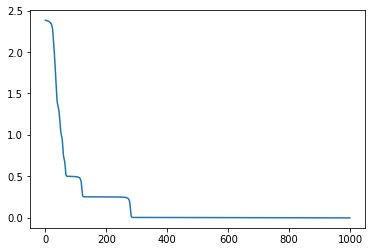

In [5]:
#define the node counts
N = 10 #number of input elements
H = 10 #number of hidden elements
M = 10 #number of output elements

#data-set stuff
m = 100 #number of examples
x_train = np.random.rand(m,N)
y_train = (np.random.rand(m,M)>0.5).astype(np.int16)

#our convension of x,y is different
x = x_train.T
y = y_train.T



#initialize the parameters as arrays with proper dimensions
W = np.random.rand(H,N)
b = np.random.rand(H)
V = np.random.rand(M,H)
c = np.random.rand(M)

cost_history = []

n_iters = 1000
for _ in range(n_iters):
    
    #forward pass calculations
    h = sigmoid(W @ x + b.reshape(-1,1))
    y_hat = sigmoid(V @ (h) + c.reshape(-1,1))
    
    #y_hat_alpha - y_alpha
    diff = y_hat - y
    dSigmoidFactor_y_hat = y_hat * (1 - y_hat)
    
    intermediate_0 = diff * dSigmoidFactor_y_hat
    
    #fine tune c
    dE_dcALLAlpha = np.sum(intermediate_0, axis = 1)/m #dim = (M,)
    ##completely found :E_dcALLAlpha
    
    
    dE_dVALLAlphaALLBeta = np.zeros((M,H))
    for beta in range(H):
        dE_dVALLAlphaThisBeta = np.sum(intermediate_0 * h[beta,:], axis=1) /m
        dE_dVALLAlphaALLBeta[:,beta] = dE_dVALLAlphaThisBeta
    ##completely found :dE_dVALLAlphaALLBeta
    
    
    dE_dbALLAlpha = np.zeros(H)
    dE_dWALLAlpha_ALLBeta = np.zeros((H,N))
    
    for alpha in range(H):
        
        dSigmoidFactor_h_alpha = h[alpha,:] #temp
        dSigmoidFactor_h_alpha *= 1- dSigmoidFactor_h_alpha #done
        
        intermediate_1 = intermediate_0 * V[:,alpha].reshape(-1,1) * dSigmoidFactor_h_alpha
        dE_dbThisAlpha= np.sum(intermediate_1)/m
        dE_dbALLAlpha[alpha] = dE_dbThisAlpha
        
        for beta in range(N):
            dE_dWThisAlphaThisBeta= np.sum(intermediate_1 * x[beta,:])/m
            dE_dWALLAlpha_ALLBeta[alpha,beta] = dE_dWThisAlphaThisBeta
    ##completely found :dE_dbALLAlpha
    ##completely found :dE_dWALLAlpha_ALLBeta
    
    
    #All derivatives are now found
    
    #calc the cost now
    cost = np.sum(y_hat - y)/(2*m)
    cost_history.append(cost)
    
    ## Update parameters :: Gradient decesnt
    lr = 1
    
    c -= lr * dE_dcALLAlpha
    V -= lr * dE_dVALLAlphaALLBeta
    b -= lr * dE_dbALLAlpha
    W -= lr * dE_dWALLAlpha_ALLBeta

        

        
print("Calculated weights")
print("c:",c)
print("V:",V)
print("b:",b)
print("W:",W)
plt.plot(cost_history)
print("Final cost is:",cost_history[-1])
